# Linear Regression

**Algoritmo de clasificación**

**La regresión es una forma estadística de establecer una relación entre una variable dependiente y un conjunto de variables independientes.
La regresión lineal o linear regression es un método para predecir la variable dependiente (y) en función de los valores de las variables independientes (X).** la regresión usa una función lineal para aproximar o predecir la variable dependiente dada como: y = ax + b

La Regresión Lineal, se utiliza para proyectos de regresión, es decir cuando queremos predecir un valor numérico, por ejemplo, queremos predecir el precio de una casa o el sueldo de una persona de acuerdo a los años de experiencia.

## 1. Importación de paquetes y dataset

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

df = pd.read_csv("./data/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2. EDA y Visual EDA

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [221]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [222]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

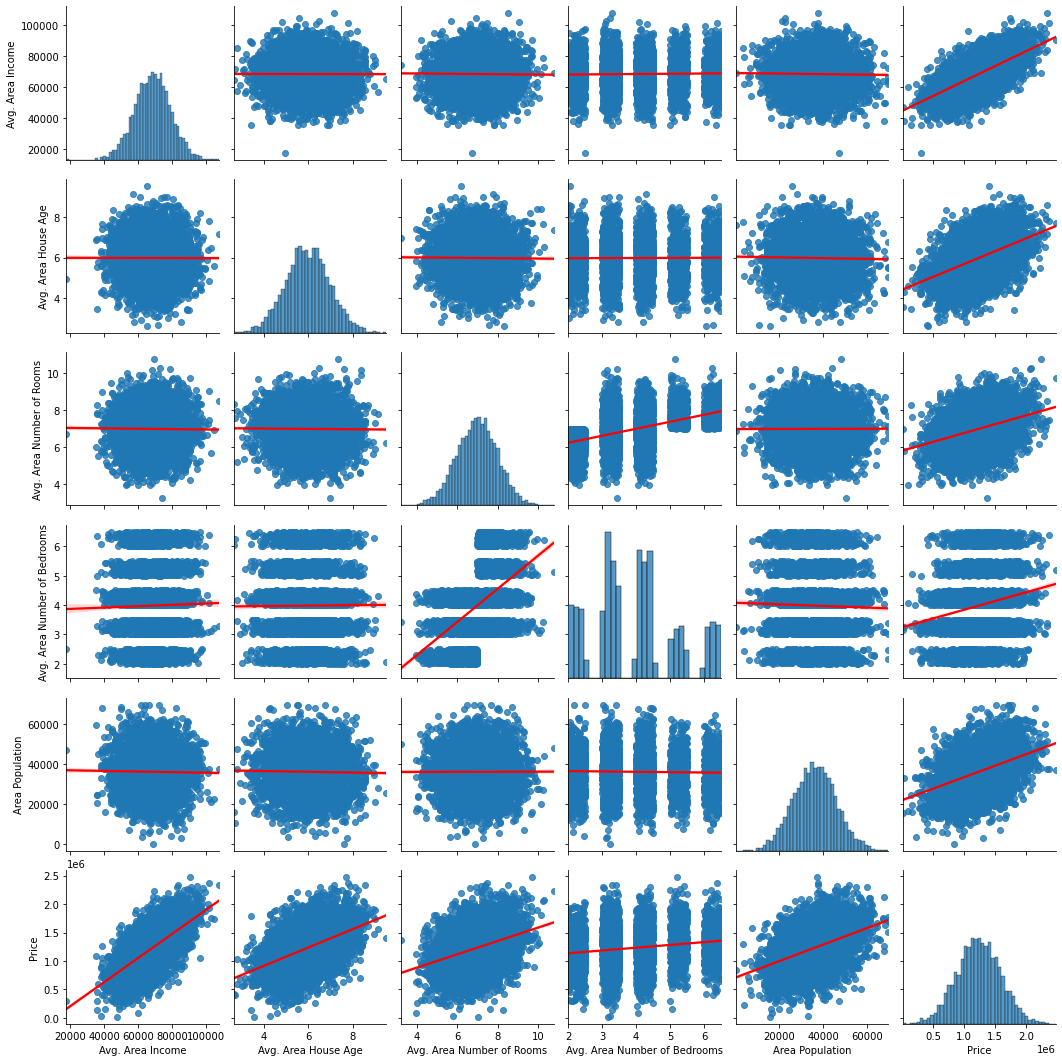

In [223]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:ylabel='Frequency'>

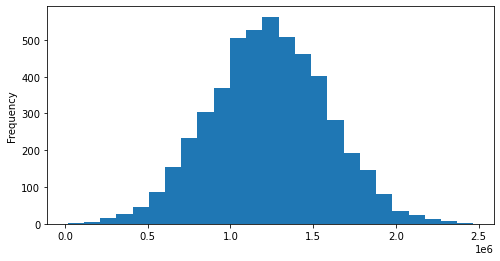

In [224]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<AxesSubplot:ylabel='Density'>

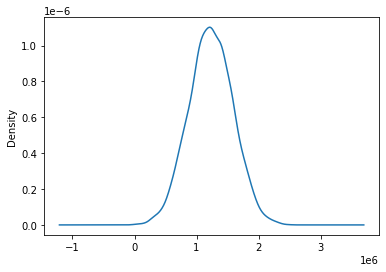

In [225]:
df['Price'].plot.density()

In [226]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

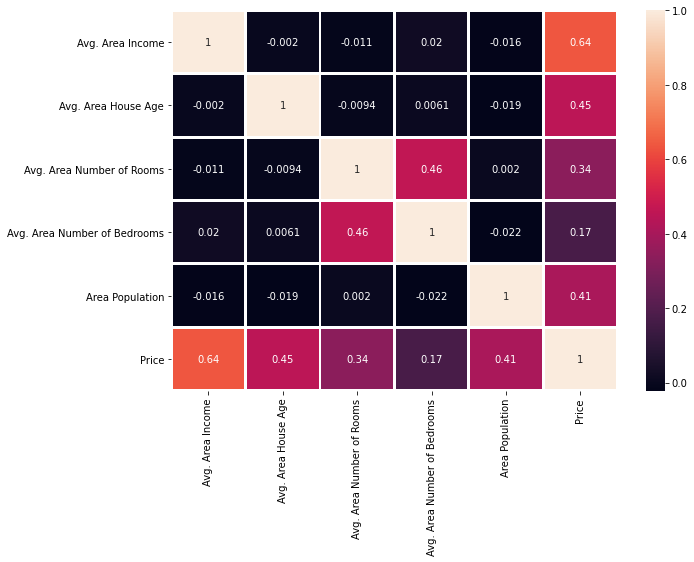

In [227]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

## 3. División del dataset

Ponemos todas las características numéricas en X y el precio en y. Se ignora Address para regresiones lineales ya que es una cadena.

In [228]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
print(l_column)
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
Feature set size: (5000, 5)
Variable set size: (5000,)


In [229]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [230]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

Dividimos el dataset en 4 grupos:

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Verificamos las divisiones train/test (deben estar en la proporción según el parámetro test_size anterior)

In [232]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


## 4. Creación del modelo

In [233]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 5. Entrenamiento

In [234]:
lm.fit(X_train,y_train)

LinearRegression()

In [235]:
print("The intercept term of the linear model:", lm.intercept_) # valor que tomaria y si mi 'a' o caracteristica valiera 0

The intercept term of the linear model: -2631028.901747257


In [236]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [237]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


## 6. Predicción

In [238]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


Gráfico de puntos del precio predicho y el y_test

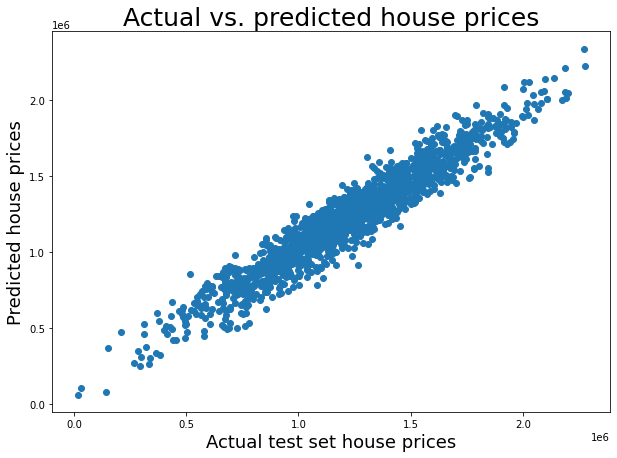

In [239]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

## 7. Cálculo de errores

In [240]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions)) # (Sumatorio(|Yi-mean(Yi)|))/N.
# El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre 10 y 0 será el doble de la diferencia entre 5 y 0. Sin embargo, lo mismo no es cierto para RMSE.
# El MAE es más robusto para los valores atípicos y no penaliza los errores tan extremadamente como el mse.
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions)) # importante. (Sumatorio(Yj-mean(Yj))^2)/N. Yj es el resultado real esperado y mean(Yj) es la predicción del modelo. Cuanto mayor sea este valor, peor es el modelo.
# promedio de la diferencia al cuadrado entre el valor objetivo y el valor predicho por el modelo de regresión.
# Calculamos el error al cuadrado, en lugar del error simple, para que el error siempre sea positivo, de esta forma sabemos que el error perfecto es 0, si no elevamos al cuadrado, unas veces el error seria positivo y otras negativo. Otra posibilidad es usar el valor absoluto pero no obtendriamos una función derivable y con una funcion derivable se hace posible el uso de algoritmos de optimizacion muy efectivos.
# Cuanto mayor sea peor es el modelo.

# MAE es menos sensible a los valores atipicos que el MSE.

print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions))) # sqrt(MSE)
# Empleamos la raiz cuadrada del MSE para que el resultado sea mas intuitivo
# Entonces, si el RMSE es más intuitivo que el MSE, ¿por qué no usamos el RMSE todo el tiempo? Hay dos razones:
# Es más costoso computacionalmente. Muchos algoritmos supervisados necesitan calcular el error en cada iteración para aprender de sus errores; así que cuanto más rápido mejor.
# La forma del error cuadrático medio hace que cierto tipos de algoritmos de optimización (tales como el gradiente descendiente), encuentre la mejor solución más rápido.
# se suele usar el MSE durante el proceso de aprendizaje y su raíz cuadrada al final, para dar una estimación en términos intuitivos de la calidad de la predicción.

print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3)) #Cuanto mas cerca de 1 mejor. Que tan bueno es nuestro modelo.
# Indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente. Solo puede aumentar a medida que se agregan predictores al modelo de regresión.

Mean absolute error (MAE): 81739.77482718266
Mean square error (MSE): 10489638335.805834
Root mean square error (RMSE): 102418.93543581593
R-squared value of predictions: 0.919
